## 資料匯入與預處理

In [68]:
import numpy as np
import pandas as pd
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

#from keras.utils import np_utils
from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Dropout, Flatten
print(train.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

In [69]:
label=train['label']
print(label.shape)
del train['label']
print(label.head())

(42000,)
0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64


In [70]:
train=train.values
train=train.reshape(train.shape[0],28,28,1)
test=test.values
test=test.reshape(test.shape[0],28,28,1)
#label = np_utils.to_categorical(label, num_classes=10)
label=to_categorical(label,10)

In [71]:
train.shape

(42000, 28, 28, 1)

## CNN

In [72]:
model = Sequential()
# Conv + Max-pooling 1
model.add(Conv2D(filters=16,kernel_size=(5,5),padding='same', input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Conv + Max-pooling 2
model.add(Conv2D(filters=36, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten層: 壓成一維
# Dense 接在內層不用input_dim，其他參數先用預設值
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='normal'))
model.add(Dropout(0.5))

model.add(Dense(10,activation='softmax'))

In [73]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               225920    
__________

In [84]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_acc')>=0.9998):
      print("\nReached 99.98% accuracy so cancelling training!")
      self.model.stop_training = True
      
callbacks = myCallback()

In [85]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy']) 
#history=model.fit(train, label, validation_split=0.2, epochs=5, batch_size=300, verbose=1)
history = model.fit(train, label, epochs=60, batch_size=512,validation_data=(train, label),callbacks=[callbacks])

Train on 42000 samples, validate on 42000 samples
Epoch 1/60
42000/42000 [==============================] - 3s 78us/step - loss: 0.0226 - acc: 0.9936 - val_loss: 0.0021 - val_acc: 0.9995
Epoch 2/60
42000/42000 [==============================] - 2s 58us/step - loss: 0.0223 - acc: 0.9939 - val_loss: 0.0020 - val_acc: 0.9995
Epoch 3/60
42000/42000 [==============================] - 2s 59us/step - loss: 0.0183 - acc: 0.9942 - val_loss: 0.0011 - val_acc: 0.9998

Reached 99.98% accuracy so cancelling training!


In [86]:
model.evaluate(train, label)

42000/42000 [==============================] - 2s 51us/step


[0.0010829299382490998, 0.9998095238095238]

## 預測

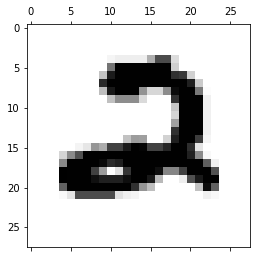

In [87]:
import matplotlib.pyplot as plt
test_img = np.reshape(test[:1, :], (28, 28))
plt.matshow(test_img, cmap = plt.get_cmap('binary'))
plt.show()

In [88]:
model.predict_classes(test[:1,:])

array([2], dtype=int64)

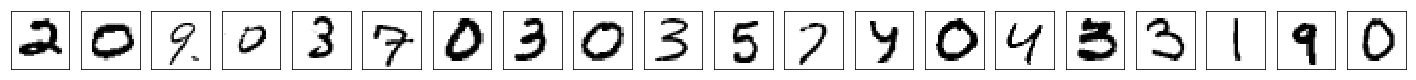

In [89]:
plt.figure(figsize=(25,10))
for i in range(0,20):
    plt.subplot(1,20,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test[i][:,:,0],cmap='binary')

In [90]:
model.predict_classes(test[:,:])

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [91]:
d=[]
for i in range(28000):
    d.append(i+1)
df = pd.DataFrame({'ImageId':d,'Label':model.predict_classes(test[:,:])})
df

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


In [92]:
df.to_csv("Whitney_submission.csv",index=False)